Adapted from NH3syn_isothermalPFR_900F.m by Takashi Yokokura F2023 for UC Berkeley CHMENG 140 F2023. Written to match syntax and flow of MATLAB code, not necessarily for Python best practice

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import warnings
warnings.filterwarnings('ignore') # A couple math no-no's in this example, but ignore them

In [2]:
# Define differential equation
def dxdV(V, x):
  dxdV = np.zeros((1,1))
  k1 = 1.2 # lbmol/ft^3/h
  beta = 0.00140
  K = 0.00467
  P = 300 # atm
  N2o = 1 # inlet N2 flow lbmol/hr

  yN = (1 - x) / (4 - 2 * x)
  yH = 3 * yN
  yNH3 = 2 * x / (4 - 2 * x)

  dxdV[0] = ( N2o**-1 * k1*( yN * yH**3 - yNH3**2 / (K**2 * P**2))
           / ( (yNH3 * yH**0.5 + beta * yH**2)**1.5 ) )

  return dxdV

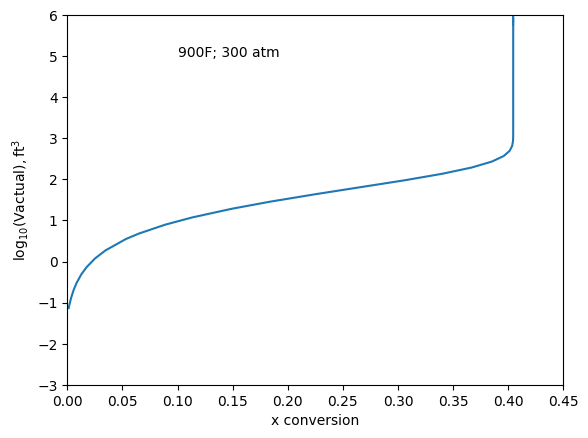

In [3]:
# Initialize
initialconversion = [0]
Vrange = [0, 4000] # ft^3

# Solve ODE
results = solve_ivp(dxdV,  Vrange, initialconversion, method = 'RK45', rtol=1e-04)

# Collect results
V, x = results.t, results.y
Vactual = V * 268 / (x + 1E-08)
logVactual = np.log10(Vactual)

# Plot results
plt.plot(*x, *logVactual) # Don't worry about the *'s; they are just to "unpack" the arrays
plt.xlim(0, 0.45)
plt.xlabel('x conversion')
plt.ylim(-3, 6)
plt.ylabel(r'$\mathrm{log_{10}(Vactual), ft^3}$') # Formatted using LATEX
plt.text(0.1, 5, '900F; 300 atm')
plt.show()

In [4]:
display(pd.DataFrame([*x, *Vactual*1E-04], index=['x', 'Vactual/10000']).T)

,x,Vactual/10000
0,0.000000,0.000000
1,0.001196,0.000007
2,0.001925,0.000009
3,0.003437,0.000013
4,0.005685,0.000020
...,...,...
5977,0.404489,264.872016
5978,0.404484,264.921413
5979,0.404466,264.983070
5980,0.404480,265.014945
